<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Разработайте такой метод преобразования данных,  чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


На первый взгляд, данные не требуют предобработки - нет пропусков, типы данных в порядке. Столбцы названы по-русски, но, наверное, это не помешает

Посмотрю, нет ли аномалий

In [3]:
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

In [4]:
data['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

In [5]:
data['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

18.0 65.0


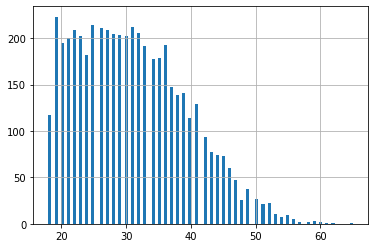

In [6]:
data['Возраст'].hist(bins=100)
print(data['Возраст'].min(), data['Возраст'].max())

5300.0 79000.0


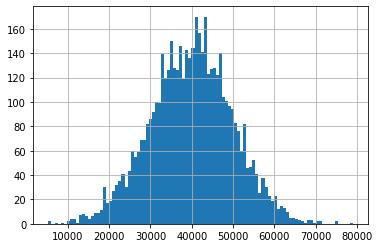

In [7]:
data['Зарплата'].hist(bins=100)
print(data['Зарплата'].min(), data['Зарплата'].max())

Аномальных значений нет

Разделю данные на признаки и целевой признак для дальнейшего обучения

In [8]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data[['Страховые выплаты']]
features.shape, target.shape

((5000, 4), (5000, 1))

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится. Для умножения подойдет любая квадратная обратимая матрица (для данной задачи размером 4х4)

**Обоснование:** 
$$
a = Xw = (X^T X)^{-1} X^T y
$$

$$
w' = ((XP)^T (XP))^{-1} (XP)^T y
$$

$$
a' = (XP) w' = (XP)((XP)^T (XP))^{-1} (XP)^T y = (XP) (P^T X^T X P)^{-1} (XP)^T y = 
$$

$$
= X P P^{-1} (P^T X^T X)^{-1} (XP)^T y = X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$


$$
(P^{-1})^T P^T = (P P^{-1})^T = E
$$

$$
P P^{-1} = E
$$

$$
a' = X (X^T X)^{-1} (X^T) y = X w = a
$$

## Алгоритм преобразования

**Алгоритм**

1. Сгененрировать случайную обратимую матрица 4х4
2. Матрицу признаков умножить на эту случайную обратимую матрицу
3. Определить метрику R2 для модели линейной регрессии на исходных данных
4. Определить метрику R2 для модели линейной регрессии на измененных данных
5. Сравнить две полученные метрики

**Обоснование**

См. предыдущее обоснование - оно подойдет для любой обратимой матрицы

## Проверка алгоритма

In [9]:
def transformation(features):
    a = np.random.randint(100, size=(4, 4))
    try:
        b = np.linalg.inv(a)
    except:
        print('Матрица не обратима')
        a = np.random.randint(100, size=(4, 4))
    print('Обратимая матрица')
    print(a)
    features_trans = features.values @ a
    return features_trans, a

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)
print(features_train.shape, features_test.shape)

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Метрика R2 до преобразования:', r2_score(target_test, predictions))

(3750, 4) (1250, 4)
Метрика R2 до преобразования: 0.42547785406963123


In [11]:
features_new, a = transformation(features)

features_train, features_test, target_train, target_test = train_test_split(features_new, target, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Метрика R2 после преобразования:', r2_score(target_test, predictions))

Обратимая матрица
[[65 36 62 83]
 [28 94 39 53]
 [77 48 18  1]
 [19 32 49 24]]
Метрика R2 после преобразования: 0.4254778540696288


<b>Сравнение моделей</b>

Модели линейной регрессии до и после преобразования имеют практически одинаковые значения метрики R2, так что можно сказать, что они не отличаются